In [1]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
tumour_images=[]
for name in glob.glob('C:/Users/HP/Desktop/brain-mri-images-for-brain-tumor1-detection/brain_tumor_dataset/yes/*.jpg'): 
    image = cv2.imread(name)
    image = cv2.resize(image,(240,240))
    tumour_images.append(image)

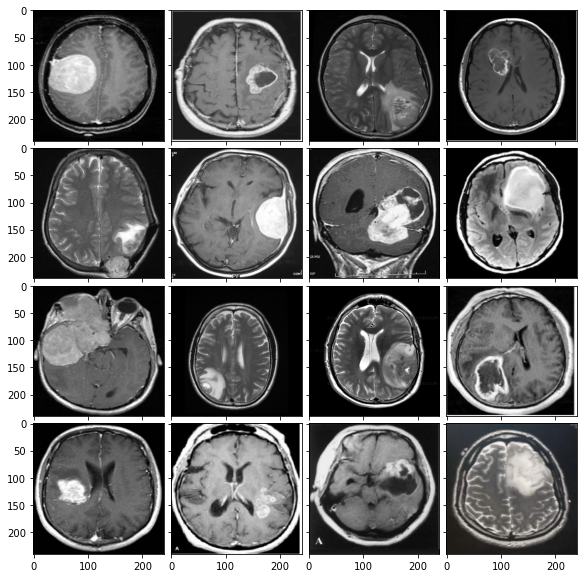

In [3]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:16]):
    ax.imshow(im)
plt.show()

In [4]:
img_path = "C:/Users/HP/Desktop/brain-mri-images-for-brain-tumor1-detection/brain_tumor_dataset/yes/Y1.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)

width: 180 pixels
height: 218 pixels
channels: 3


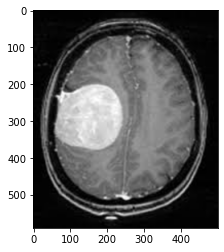

In [5]:
plt.imshow(image)

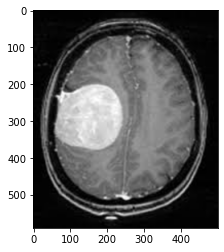

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
plt.imshow(image)


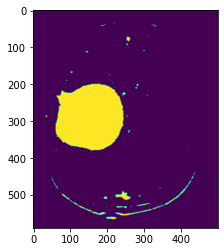

In [7]:
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)


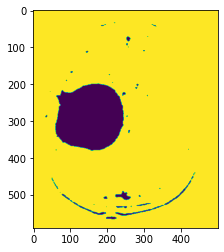

In [8]:
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

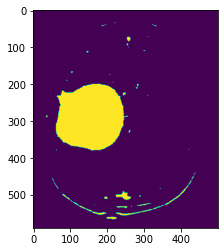

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [10]:
closed = cv2.erode(closed, None, iterations = 19)
closed = cv2.dilate(closed, None, iterations = 17)

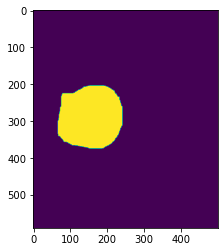

In [11]:
plt.imshow(closed)

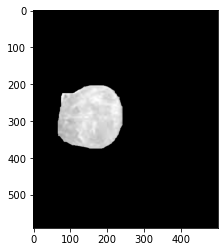

In [12]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
plt.imshow(final)

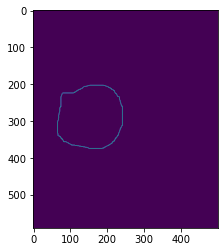

In [13]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged
canny = auto_canny(closed)
plt.imshow(canny)

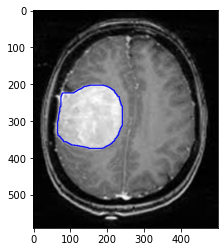

In [14]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
plt.imshow(image)

In [15]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.3.0'

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/HP/Desktop/brain-mri-images-for-brain-tumor1-detection/brain_tumor_dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/HP/Desktop/brain-mri-images-for-brain-tumor1-detection/brain_tumor_dataset',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [18]:
cnn = tf.keras.models.Sequential()

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [22]:
cnn.add(tf.keras.layers.Flatten())

In [23]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


In [24]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
8/8 [==============================] - 5s 599ms/step - loss: 0.1737 - accuracy: 0.9447 - val_loss: 0.0749 - val_accuracy: 0.9763
Epoch 2/25
8/8 [==============================] - 4s 533ms/step - loss: 0.1597 - accuracy: 0.9526 - val_loss: 0.0796 - val_accuracy: 0.9684
Epoch 3/25
8/8 [==============================] - 4s 526ms/step - loss: 0.1517 - accuracy: 0.9407 - val_loss: 0.0814 - val_accuracy: 0.9644
Epoch 4/25
8/8 [==============================] - 4s 511ms/step - loss: 0.1295 - accuracy: 0.9526 - val_loss: 0.0932 - val_accuracy: 0.9605
Epoch 5/25
8/8 [==============================] - 4s 527ms/step - loss: 0.1085 - accuracy: 0.9763 - val_loss: 0.0585 - val_accuracy: 0.9881
Epoch 6/25
8/8 [==============================] - 4s 516ms/step - loss: 0.1049 - accuracy: 0.9723 - val_loss: 0.0991 - val_accuracy: 0.9684
Epoch 7/25
8/8 [==============================] - 4s 509ms/step - loss: 0.1477 - accuracy: 0.9486 - val_loss: 0.1007 - val_accuracy: 0.9526
Epoch 8/25
8/8 [====

In [29]:
import cv2
import matplotlib.pyplot as plt
img_path = "C:/Users/HP/Desktop/brain-mri-images-for-brain-tumor1-detection/single_prediction/yes_or_no1.jpg"
image = cv2.imread(img_path)
dim=(500,590)
image=cv2.resize(image, dim)

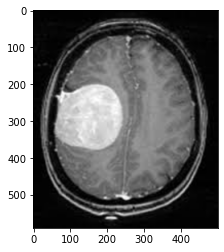

In [30]:
plt.imshow(image)

In [31]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/HP/Desktop/brain-mri-images-for-brain-tumor1-detection/single_prediction/yes_or_no1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'yes'
else:
    prediction = 'no'
print(prediction)

yes
